In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pathlib
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [12]:
data_dir_train=pathlib.WindowsPath("C:/Users/NitroPC/Documents/Python/ConcursoModelizacion/ConcursoModelizacion/Resource/data/train")
train_images=list(data_dir_train.glob('*/*.png'))
data_dir_test=pathlib.WindowsPath("C:/Users/NitroPC/Documents/Python/ConcursoModelizacion/ConcursoModelizacion/Resource/data/test")
test_images=list(data_dir_test.glob('*/*.png'))
print(len(train_images),len(test_images))

28709 7178


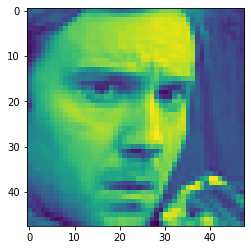

In [13]:
im=PIL.Image.open(str(train_images[0]))
plt.imshow(im)

In [14]:
batch_size=32
img_height=48
img_width=48

In [15]:
names=['angry','disgusted','fearful','happy','neutral','sad','suprised']

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7178 files belonging to 7 classes.
Using 1435 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


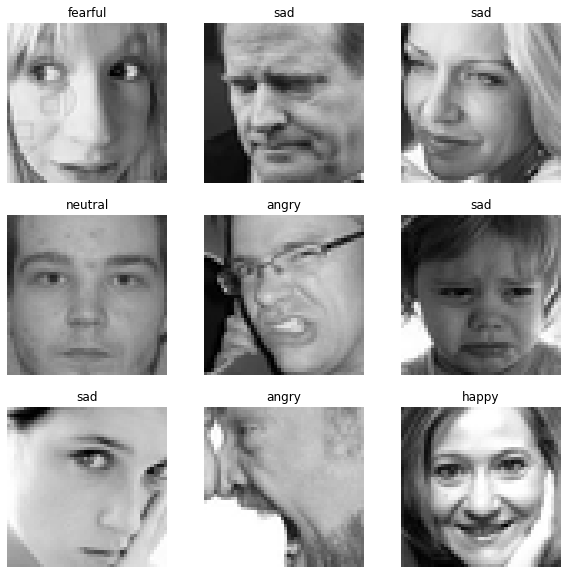

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 3)
(32,)


In [23]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [25]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.003921569 0.8941177


In [26]:
num_classes = 7

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
610/718 [========================>.....] - ETA: 1:50 - loss: 1.7914 - accuracy: 0.2615